# IS608 Project -- Sreejaya Vasudevannair


#### Project Title: US Motor Vehicle Fatality Analysis
The goal of this project is to create choropleth map of US Motor Vehicle Fatality on US State level. 
The National Highway Traffic Safety Administration(NHTSA) has a dataset called  **[Fatality Reporting System(FARS)](ftp://ftp.nhtsa.dot.gov/fars) ** to record every fatal traffic crash in the US. Collected data include 
1.	Crash characteristics
2.	Vehicle characteristics
3.	Person characteristics
4.	Weather and time of the day.

The data source is from ftp://ftp.nhtsa.dot.gov/fars/2014  and http://www-fars.nhtsa.dot.gov/Trends/TrendsGeneral.aspx.
The files are saved as .dbf. I converted them to comma delimited vectors(CSV). 

In [7]:
%matplotlib inline
import numpy as np
from numpy import *
import random
import matplotlib.pyplot as plt
import pandas as pd

import plotly
from plotly.graph_objs import Scatter, Layout
import plotly.plotly as py
import plotly.graph_objs as go

** Fatality trend from 1994 to 2014 **

In [55]:

#df=pd.read_csv('C:/DataAnalytics/MSDASemester3/608/Project/Data_proj/CSV/USAFatalCrashes1994_2014.csv')
df=pd.read_csv('https://raw.githubusercontent.com/srajeev1/IS608Project/master/data/USAFatalCrashes1994_2014.csv')
plotly.offline.init_notebook_mode() # run at the start of every notebook
plotly.offline.iplot({
"data": [{
    "x": df.Year,
    "y": df.Total
}],
      
"layout": go.Layout(
    title='Total Crashes By Year',
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
})

The Fatality Rate has declining from 2005.

### Top 5 US States based of Traffic fatality Rates.###

In [57]:
FatalitybySTATE_Data=pd.read_csv('https://raw.githubusercontent.com/srajeev1/IS608Project/master/data/USAFatalities_FatalityRatesbySTATE1994_2014.csv')
FatalitybySTATE_Data =FatalitybySTATE_Data[pd.notnull(FatalitybySTATE_Data['State'])]

#find the total fatality for 1994-2014
FatalitybySTATE_df =FatalitybySTATE_Data[FatalitybySTATE_Data.columns[0:23]]
FatalitybySTATE_df =FatalitybySTATE_df.drop(FatalitybySTATE_df.columns[1],axis=1)
FatalitybySTATE_df['Total']=FatalitybySTATE_df.sum(axis=1)
FatalitybySTATE_df=FatalitybySTATE_df.sort(['Total'],ascending=[0])

#top 5 States
FatalitybySTATE_df[0:1].drop(FatalitybySTATE_df.columns[0],axis=1)
FatalitybySTATE_dt=FatalitybySTATE_df[1:6].transpose()
FatalitybySTATE_dt=FatalitybySTATE_dt[1:22]
FatalitybySTATE_dt.columns=['California', 'Texas', 'Florida', 'Georgia', 'North Carolina']
FatalitybySTATE_dt.head(5)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,California,Texas,Florida,Georgia,North Carolina
1994,4232,3187,2687,1425,1431
1995,4192,3183,2805,1488,1448
1996,3989,3742,2753,1573,1494
1997,3688,3513,2785,1577,1483
1998,3494,3586,2825,1568,1596


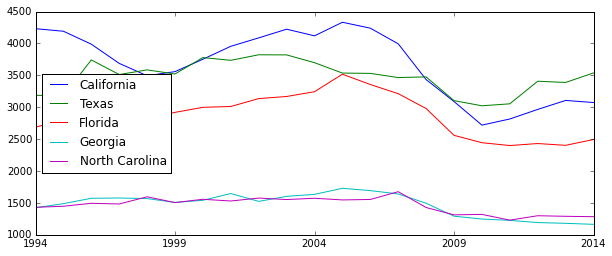

In [17]:
py.sign_in('sreejaya', '18o7jxvx8l')

plots = FatalitybySTATE_dt.plot(subplots=False, figsize=(10, 4),)
plt.legend(loc='center left')

plt .show()

When we look at the top5 states we could not see any significant reduction in the traffic accidents.

### Create choropleth map of the rate of accidents per State 

In [58]:
#Collected State-County Data from Bokeh sample Data. Joined this fime with accidents file to get the state names.
import plotly.plotly as py
USAccidents_Data=pd.read_csv('https://raw.githubusercontent.com/srajeev1/IS608Project/master/data/USAAccidents2014.csv')

#USAccidents_Data.head(10)

Counties=pd.read_csv('https://raw.githubusercontent.com/srajeev1/IS608Project/master/data/US_Counties.csv')
#Counties.head(10)

Accidents_county = pd.merge(left=USAccidents_Data,right=Counties,  left_on=['STATE','COUNTY'], right_on=['STATE num','COUNTY num'])

Accidents_countydf =Accidents_county[['State Abbr.','STATE','COUNTY','VE_TOTAL','LATITUDE','LONGITUD','State-County','Geographic Name']]
#Accidents_countydf.head(10)
Accidents_countydf1 =Accidents_county[['State Abbr.','VE_TOTAL']]
Accidents_countydf1['TotalAccidents'] =Accidents_countydf1.groupby(['State Abbr.'])['VE_TOTAL'].transform(np.sum)

Accidents_countydf1=Accidents_countydf1.drop_duplicates(['State Abbr.','TotalAccidents'])
Accidents_countydf1.head(50)

for col in Accidents_countydf1.columns:
    Accidents_countydf1[col] = Accidents_countydf1[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]



data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = Accidents_countydf1['State Abbr.'],
        z = Accidents_countydf1['TotalAccidents'].astype(float),
        locationmode = 'USA-states',
        text = Accidents_countydf1['State Abbr.'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "US Traffic crashes"
        )
    ) ]

layout = dict(
        title = '2014 US Traffic Crashes By States)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
    
fig = dict( data=data, layout=layout )
py.iplot(fig, validate=False, filename='d3-2014 US Traffic Crashes By States')

url = py.plot( fig, filename='d3-2014 US Traffic Crashes By States' )


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [59]:

from IPython.display import HTML
HTML('<iframe src=https://plot.ly/~sreejaya/12/_2014-us-traffic-crashes-by-states/ width=100% height=550></iframe>')


### What causes most of the accidents?

### 1. Alcohol


In [26]:
from bokeh.plotting import *
dfAlcohol=pd.read_csv('C:/DataAnalytics/MSDASemester3/608/Project/Data_proj/CSV/USAAlcohol1994-2014.csv')
dfAlcohol.head(5)
percents =dfAlcohol['Year']

In [60]:
import plotly.plotly as py
from plotly.graph_objs import *

fig = {
    'data': [
        {
            'labels': ['without Alcohol-21005','with Alcohol-11906'],
            'values': [21005,11906],
            'type': 'pie',
            'name': '2010-Total(32999)',
            'marker': {'colors': ['rgb(56, 75, 126)']},
            'domain': {'x': [0, .48],
                       'y': [0, .49]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'
        },
        {
            'labels': ['without Alcohol-20848','with Alcohol-11527'],
            'values': [20848,11527],
            'type': 'pie',
            'name': '2011-Total(32479)',
            'marker': {'colors': ['rgb(56, 75, 126)']},
            'domain': {'x': [.52, 1],
                       'y': [0, .49]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'
        },
        {
            'labels': ['without Alcohol-21563','with Alcohol-12118'],
            'values': [21563,12118],
            'type': 'pie',
            'name': '2012-Total(33782)',
            'marker': {'colors': ['rgb(56, 75, 126)']},
            'domain': {'x': [0, .48],
                       'y': [.51, 1]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'
        },
        {
            'labels': ['without Alcohol-20843','with Alcohol-11941'],
            'values': [20843,11941],
            'type': 'pie',
            'name': '2013-Total(32894)',
            'marker': {'colors': ['rgb(56, 75, 126)']},
             'domain': {'x': [.52, 1],
                       'y': [.51, 1]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'
        },
        {
            'labels': ['without Alcohol-20856','with Alcohol-11731'],
            'values': [20856,11731],
            'type': 'pie',
            'name': '2014-Total(32675)',
            'marker': {'colors': ['rgb(56, 75, 126)']},
            'domain': {'x': [2, .48],
                       'y': [2, .49]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'
        }
    ],
    'layout': {'title': '2010-2014 Alcohol Relatd Crashes ',
               'showlegend': True}
}

#fig = dict(data=data, layout=layout)

#py.iplot(fig, validate=False, filename='d3-Alcohol Related Accidents from 2010-2014')
url = py.plot(fig, filename='d3-Alcohol Related Accidents from 2010-2014')

In [61]:
from IPython.display import HTML
HTML('<iframe src=https://plot.ly/~sreejaya/10/_2010-2014-alcohol-relatd-crashes/ width=100% height=550></iframe>')


** More than 35% of accidents are Alcohol related. The rate has no change in years. **

### 2. Weather Related ###

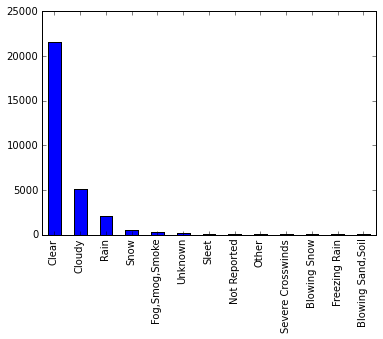

In [62]:
USAccidents_Data.WeatherVal.value_counts().plot(kind='bar')

** Weather has no significant impact on accidents. **

### 3. Time of the day ###

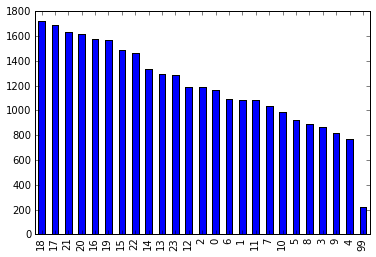

In [63]:
USAccidents_Data.HOUR.value_counts().plot(kind='bar')

** This chart shows most of the accidents happen during or after sunset. So sun light also has an impact on accidents. **

### 4. Day of the week ###

In [52]:
from IPython.display import HTML
HTML('<iframe src=http://htmlpreview.github.io/?http://github.com/srajeev1/IS608Project/blob/master/googlechart.html width=100% height=550></iframe>')


It is clear from the above chart that week end's are more prone to accidents than regular week hours. 
